In [1]:
import numpy as np

# Автоколл

Задача 1. Рассмотрим структурный продукт типа автоколл на бездивидендные акции с динамикой  $S_t \sim GBM(\mu,\sigma)$, $S(0) = 100$ и волатильностью $25\%$, безрисковая ставка $0\%$ и следующей функцией выплаты:

\begin{equation*}
%X(\omega) =
 \begin{cases}
%   1 &\text{se $\omega\in A$}\\
%   1250 &\text{se $\omega \in A^c$}
    (1 + c),  & \text{если по истечении первого года } S(1) > S(0),\\
              & \text{продукт прекращает свое действие},\\
    (1 + 2c), & \text{если через два года } S(2) > S(0),\\
              & \text{продукт прекращает свое действие};\\
    \max\left(1 + 3c, \frac{S(3)}{S(0)}\right), & \text{если через три года }
                                                S(3) > 0.7 \times S(0), \\
                                                & \text{продукт прекращает свое действие};\\
    \frac{S(3)}{S(0)},& \text{во остальных случаях}.
   \end{cases}
\end{equation*}


Применяя моделирование Монте-Карло определите численное значение купона $c$, при котором выплата составит $\frac{S(3)}{S(0)}$.

In [2]:
%%time

r = 0
q = 0
mu     = r - q
sigma  = 0.25
S0     = 100
nPaths = 2_000_000


simuls = []
for _ in range(nPaths):
    S1 = S0 * np.exp(mu - 0.5 * sigma**2 + sigma * np.random.normal())
    S2 = S1 * np.exp(mu - 0.5 * sigma**2 + sigma * np.random.normal())
    S3 = S2 * np.exp(mu - 0.5 * sigma**2 + sigma * np.random.normal())
    simuls.append([S1, S2, S3])

coupon = 0.0765 # определить программно
payoff = []

for simul in simuls:
    if simul[0]>S0:
        payoff.append(1+coupon)
    elif simul[1]>S0:
        payoff.append(1+2*coupon)
    elif simul[2]>0.7*S0:
        payoff.append(max(1+3*coupon, simul[2]/S0))
    else:
        payoff.append(simul[2]/S0)
        
print(np.mean(payoff))

1.0011346834277772
CPU times: user 11.9 s, sys: 0 ns, total: 11.9 s
Wall time: 11.9 s


In [3]:
%%time
np_simuls = np.asarray(simuls)
np_simuls_mean = np_simuls.mean(axis=0)
print('Mean S(3)/S(0) ~ ', np_simuls_mean[2]/S0)

def coupon_dependent_payoff(coupon):   
    payoff = []
    for simul in simuls:
        if simul[0] > S0:
            payoff.append(1 + coupon)
        elif simul[1] > S0:
            payoff.append(1 + 2 * coupon)
        elif simul[2] > 0.7 * S0:
            payoff.append(max(1 + 3 * coupon, simul[2] / S0))
        else:
            payoff.append(simul[2]/S0)
    return np.mean(payoff)

def calc_derivative(func, x, dx=1e-2):
    return (func(x + dx) - func(x - dx)) / 2 / dx

def mse_loss(coupon):
    return (coupon_dependent_payoff(coupon) - np_simuls_mean[2]/S0)**2

coupon = 0
alpha = 0.25
i = 0
mse_loss_v = 1
while mse_loss_v > 1e-8:
    mse_loss_v = mse_loss(coupon)
    i += 1
    deriv = calc_derivative(mse_loss, coupon)
    coupon -= alpha * deriv
    # if i % 5 == 0:
    print('Iteration = ', i, ', coupon = ', coupon, ' mse_loss = ', mse_loss_v)
print('Numerically calculated coupon = ', coupon)

Mean S(3)/S(0) ~  0.9999895971503453
Iteration =  1 , coupon =  0.0532751399103117  mse_loss =  0.008586210630805573
Iteration =  2 , coupon =  0.07092499900852464  mse_loss =  0.000797845516294174
Iteration =  3 , coupon =  0.07468422463647288  mse_loss =  3.5508828078325446e-05
Iteration =  4 , coupon =  0.0754036013367453  mse_loss =  1.3726393794718916e-06
Iteration =  5 , coupon =  0.07553847341548588  mse_loss =  6.457707316982599e-08
Iteration =  6 , coupon =  0.07556366123834055  mse_loss =  6.733074369042034e-09
Numerically calculated coupon =  0.07556366123834055
CPU times: user 11.2 s, sys: 228 ms, total: 11.5 s
Wall time: 11.5 s


Определите значения |купона| барьера таким образом, чтобы продукт был исполнен в

а) первый год,

б) второй год,

в) третий год.

Приведите графики функций выплат по продукту для всех вариантов.

Сравните функции выплат структурного продукта типа автоколл с ванильным опционом. Приведите иллюстративный график и сделайте выводы.


In [4]:
%%time
np_simuls = np.asarray(simuls)

barrier_95q = np.quantile(np_simuls[:,0], q=0.95)
print('Barrier level to execute the coupon in the 1st year = ', barrier_95q)

nPaths = 100_000


simuls = []
for _ in range(nPaths):
    S1 = S0 * np.exp(mu - 0.5 * sigma**2 + sigma * np.random.normal())
    S2 = S1 * np.exp(mu - 0.5 * sigma**2 + sigma * np.random.normal())
    S3 = S2 * np.exp(mu - 0.5 * sigma**2 + sigma * np.random.normal())
    simuls.append([S1, S2, S3])

b1, b2, b3 = 0, 0, 0
for simul in simuls:
    if simul[0]>S0:
        b1 += 1
    elif simul[1]>S0:
        b2 += 1
    elif simul[2]>0.7*S0:
        b3 += 1
    else:
        payoff.append(simul[2]/S0)

Barrier level to execute the coupon in the 1st year =  146.2720162414049
CPU times: user 1.14 s, sys: 93 ms, total: 1.24 s
Wall time: 1.22 s


In [5]:
b = 100

In [6]:
nPaths = 100_000
simuls = []
for _ in range(nPaths):
    S1 = S0 * np.exp(mu - 0.5 * sigma**2 + sigma * np.random.normal())
    S2 = S1 * np.exp(mu - 0.5 * sigma**2 + sigma * np.random.normal())
    S3 = S2 * np.exp(mu - 0.5 * sigma**2 + sigma * np.random.normal())
    simuls.append([S1, S2, S3])

b1, b2, b3 = 0, 0, 0
for simul in simuls:
    if simul[0] > b:
        b1 += 1
    elif simul[1] > b:
        b2 += 1
    elif simul[2] > 0.7 * b:
        b3 += 1
    else:
        pass

Задача 2. Предположим, что динамика базового актива описывается геометрическим броуновским движением $S_t \sim GBM(\mu,\sigma)$.

а) Вычислите аналитически вероятность срабатывания автоотзыва $\mathbb{P}(\tau = t_k)=p_k$ для продукта с характеристиками $S(0)=1$, $\mu=5\%$, $\sigma=25\%$,
$t_k=\frac{6+(k-1)}{12}$, $k=1,2, \ldots, 6$.

б) Вычислите вероятность того, что продукт достигнет «конца» своего срока действия:

$(1 − 𝑝_1)(1 − 𝑝_2)(1 − 𝑝_3) … (1 − 𝑝_{𝑛−1})$,

где $𝑝_k$ -- вероятность досрочного погашения в дату проверки условий $𝑡_k$.

Выполните Монте-Карло моделирование и сравните результаты.

Ожидаемое решение для пункта (а): $[45.45, 6.29, 4.1,3.07, 2.43, 1.99]$.

в) Постройте график зависимости вероятности срабатывания автоотзыва от времени.

г) Оцените приведенную стоимость структурного продукта, NVP.

In [398]:
import scipy, copy
# analytical solution
# using analytical formula

# probability of execution
def execution_proba(S0, b, mu, sigma, timeline):
    # build covariate matrix
    cov_matrix = np.eye(len(timeline))
    for i, t1 in enumerate(timeline):
        for j, t2 in enumerate(timeline):
            if i != j:
                cov_matrix[i, j] = min(t1, t2)
                cov_matrix[j, i] = cov_matrix[i, j]
    L = [np.zeros_like(timeline) for _ in range(len(timeline))]
    U = [np.zeros_like(timeline) for _ in range(len(timeline))]
    values = np.asarray([(np.log(b / S0) - (mu - sigma**2 / 2) * t) / sigma for t in timeline])
    for i, t in enumerate(timeline):
        L[i] = [-10**10 if k < i else values[k] for k in range(len(timeline))]
        U[i] = [values[k] if k < i else 10**10 for k in range(len(timeline))]
    probs = [
        scipy.stats.multivariate_normal.cdf(x=U[i-1][:i], mean=np.zeros(len(timeline))[:i], cov=cov_matrix[:i,:i]) -\
            scipy.stats.multivariate_normal.cdf(x=L[i-1][:i], mean=np.zeros(len(timeline))[:i], cov=cov_matrix[:i, :i]) 
        for i in range(1, len(timeline)+1)]
    return np.asarray(probs)

In [400]:
# task 1
# a) 
S0 = 1
mu = 0.05
sigma = 0.25
timeline = np.linspace(1/2, 1, 6)
probs = execution_proba(S0=1, b=1, mu=0.05, sigma=0.25, timeline=timeline)
print('Probs = ', np.round(probs,3)*100, '%')

Probs =  [51.5 48.5 31.7 24.3 20.6 18.7] %


In [401]:
# task 1 ; b)
P = np.prod(1-probs)
print('Probability that the product will survive till the end = ', round(P, 3)*100,'%')

Probability that the product will survive till the end =  8.3 %


Text(0, 0.5, 'Probability of autocall, %')

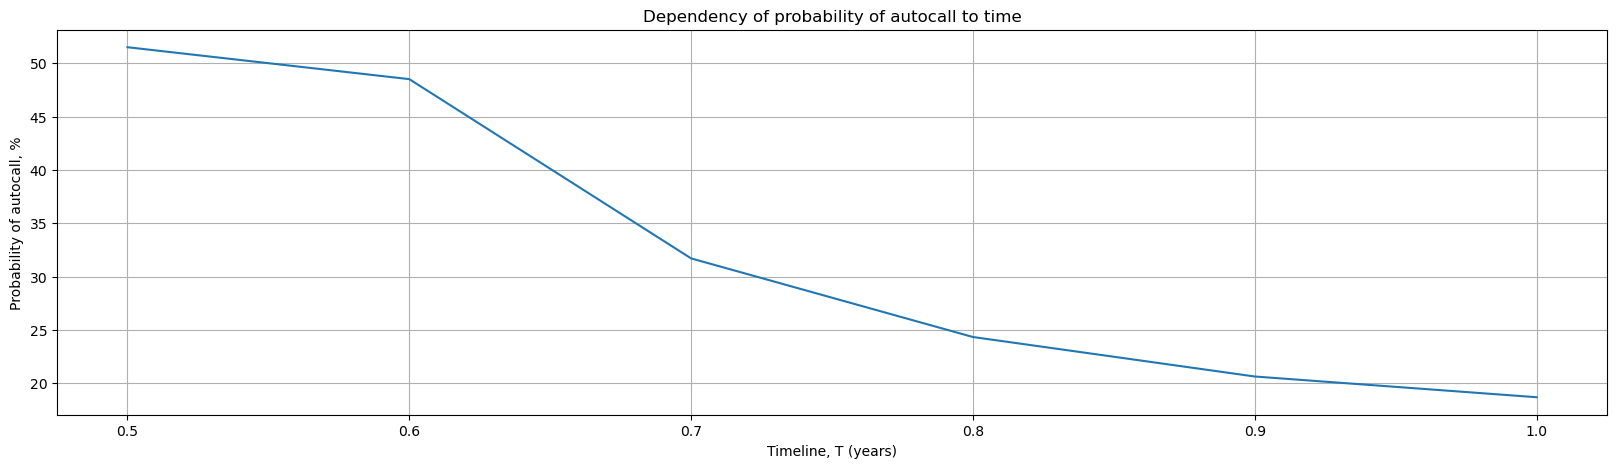

In [402]:
# task 1 ; c) plot
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.title('Dependency of probability of autocall to time')
plt.plot(timeline, probs*100)
plt.grid()
plt.xlabel('Timeline, T (years)')
plt.ylabel('Probability of autocall, %')

In [403]:
# task 1: d) NVP

r = 0
q = 0
mu     = 0.05
sigma  = 0.25
S0     = 100
nPaths = 100_000

simuls = []
for _ in range(nPaths):
    S1 = S0 * np.exp(mu - 0.5 * sigma**2 + sigma * np.random.normal())
    S2 = S1 * np.exp(mu - 0.5 * sigma**2 + sigma * np.random.normal())
    S3 = S2 * np.exp(mu - 0.5 * sigma**2 + sigma * np.random.normal())
    simuls.append([S1, S2, S3])

coupon = 0.0765
payoff = []

for simul in simuls:
    if simul[0]>S0:
        payoff.append( (1 + coupon) / (1 + mu) ** 1 ) # discount the payoff
    elif simul[1]>S0:
        payoff.append( (1 + 2 * coupon) / (1 + mu) ** 2 ) # discount the payoff
    elif simul[2]>0.7*S0:
        payoff.append( max(1 + 3 * coupon, simul[2] / S0) /  (1 + mu) ** 3) # discount the payoff
    else:
        payoff.append(simul[2]/S0)
        
print('NVP for the structured product = ', round(np.mean(payoff), 3))

NVP for the structured product =  0.975
